In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/diabetes.csv"

response = requests.get(url)

data = StringIO(response.text)
df = pd.read_csv(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

In [4]:
Y = pd.get_dummies(Y).values  # y를 원핫 인코딩

X = X.values  #넘파이

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) # 20% 만

X_train.shape, X_test.shape, Y

((614, 8),
 (154, 8),
 array([[False,  True],
        [ True, False],
        [False,  True],
        ...,
        [ True, False],
        [False,  True],
        [ True, False]]))

In [6]:
model = Sequential()
model.add(Dense(64, input_shape=(8,), activation='relu'))  # 첫 은닉층
model.add(Dense(32, activation='relu'))                     # 두 번째 은닉층
model.add(Dense(2, activation='softmax'))                   # 출력층 (이진 분류)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\chelego\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,722 (10.63 KB)

 Trainable params: 2,722 (10.63 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model_history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.4714 - loss: 7.0745 - val_accuracy: 0.5519 - val_loss: 1.6387
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5852 - loss: 1.3549 - val_accuracy: 0.6039 - val_loss: 0.8971
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5866 - loss: 0.9424 - val_accuracy: 0.6753 - val_loss: 0.6924
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6456 - loss: 0.7528 - val_accuracy: 0.6753 - val_loss: 0.6886
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6523 - loss: 0.8404 - val_accuracy: 0.6883 - val_loss: 0.7096
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6036 - loss: 0.8798 - val_accuracy: 0.7143 - val_loss: 0.6632
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6238 - loss: 0.7888 - val_accuracy: 0.7078 - val_loss: 0.7745
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6615 - loss: 0.8335 - val_accuracy: 0.6623 - v

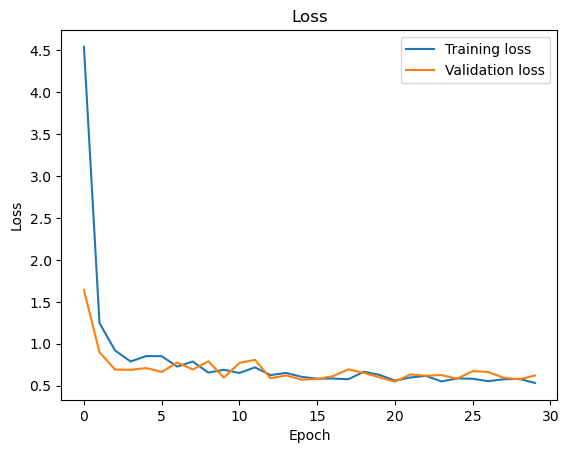

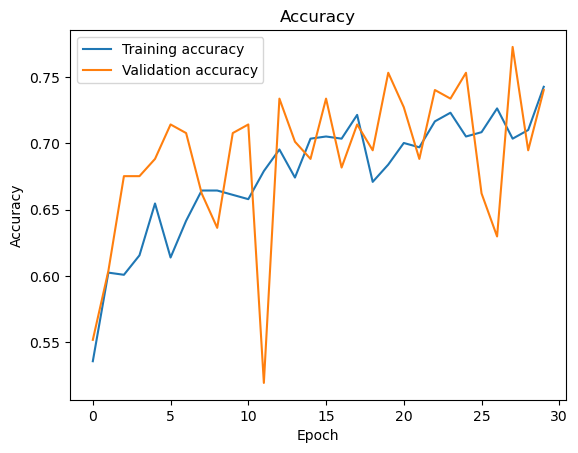

In [17]:
#Loss graph
plt.plot(model_history.history['loss'], label='Training loss')
plt.plot(model_history.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Loss graph
plt.plot(model_history.history['accuracy'], label='Training accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
Y_pred = model.predict(X_test)

Y_test_class = np.argmax(Y_test, axis=1)

Y_pred_class = np.argmax(Y_pred, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [21]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_test_class, Y_pred_class))
print(confusion_matrix(Y_test_class, Y_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       107
           1       0.59      0.47      0.52        47

    accuracy                           0.74       154
   macro avg       0.69      0.66      0.67       154
weighted avg       0.73      0.74      0.73       154

[[92 15]
 [25 22]]
